In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab4/data.csv')

In [3]:
correlations = df.corr()

In [4]:
correlations

,Var1,Var2,Var3,Var4,Var5,Var6,Result
Var1,1.000000,0.056326,-0.035236,0.033317,-0.004222,0.029818,0.871279
Var2,0.056326,1.000000,-0.019266,0.005555,-0.000932,-0.043397,0.028140
Var3,-0.035236,-0.019266,1.000000,0.059719,0.023266,-0.021135,0.397683
Var4,0.033317,0.005555,0.059719,1.000000,-0.008156,-0.040191,0.053928
Var5,-0.004222,-0.000932,0.023266,-0.008156,1.000000,0.063654,0.028496
Var6,0.029818,-0.043397,-0.021135,-0.040191,0.063654,1.000000,0.017604
Result,0.871279,0.028140,0.397683,0.053928,0.028496,0.017604,1.000000


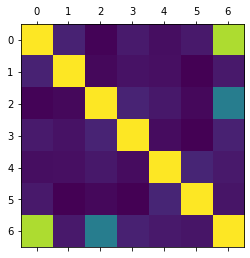

In [5]:
plt.matshow(correlations)

plt.show()

In [6]:
correlations.style.background_gradient(cmap='coolwarm')


,Var1,Var2,Var3,Var4,Var5,Var6,Result
Var1,1.000000,0.056326,-0.035236,0.033317,-0.004222,0.029818,0.871279
Var2,0.056326,1.000000,-0.019266,0.005555,-0.000932,-0.043397,0.028140
Var3,-0.035236,-0.019266,1.000000,0.059719,0.023266,-0.021135,0.397683
Var4,0.033317,0.005555,0.059719,1.000000,-0.008156,-0.040191,0.053928
Var5,-0.004222,-0.000932,0.023266,-0.008156,1.000000,0.063654,0.028496
Var6,0.029818,-0.043397,-0.021135,-0.040191,0.063654,1.000000,0.017604
Result,0.871279,0.028140,0.397683,0.053928,0.028496,0.017604,1.000000


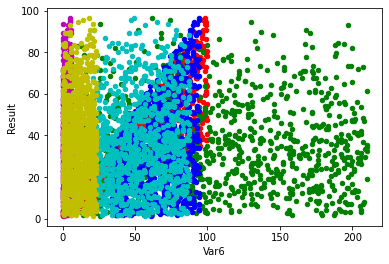

In [7]:
ax1 = df.plot(kind='scatter', x='Var1', y='Result', color='r')    
ax2 = df.plot(kind='scatter', x='Var2', y='Result', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Var3', y='Result', color='b', ax=ax1)
ax4 = df.plot(kind='scatter', x='Var4', y='Result', color='c', ax=ax1)    
ax5 = df.plot(kind='scatter', x='Var5', y='Result', color='m', ax=ax1)    
ax6 = df.plot(kind='scatter', x='Var6', y='Result', color='y', ax=ax1)


In [8]:
x = df.values
scaler = preprocessing.MinMaxScaler().fit(x)
x = scaler.transform(x)
df = pd.DataFrame(x)

In [9]:
df

,0,1,2,3,4,5,6
0,0.33,0.980100,0.883333,0.909091,0.333333,0.173913,0.316139
1,0.49,0.024876,0.866667,0.439394,0.000000,0.391304,0.452153
2,0.79,0.313433,0.933333,0.621212,0.166667,0.217391,0.764607
3,0.28,0.815920,0.250000,0.696970,0.000000,0.217391,0.143384
4,0.62,0.895522,0.966667,0.393939,0.166667,0.869565,0.613644
...,...,...,...,...,...,...,...
995,0.89,0.024876,0.350000,0.666667,0.000000,0.217391,0.521950
996,0.23,0.825871,0.300000,0.409091,0.000000,0.608696,0.124013
997,0.20,0.661692,0.750000,0.287879,0.833333,0.347826,0.186230
998,0.65,0.094527,1.000000,0.227273,0.000000,0.130435,0.655753


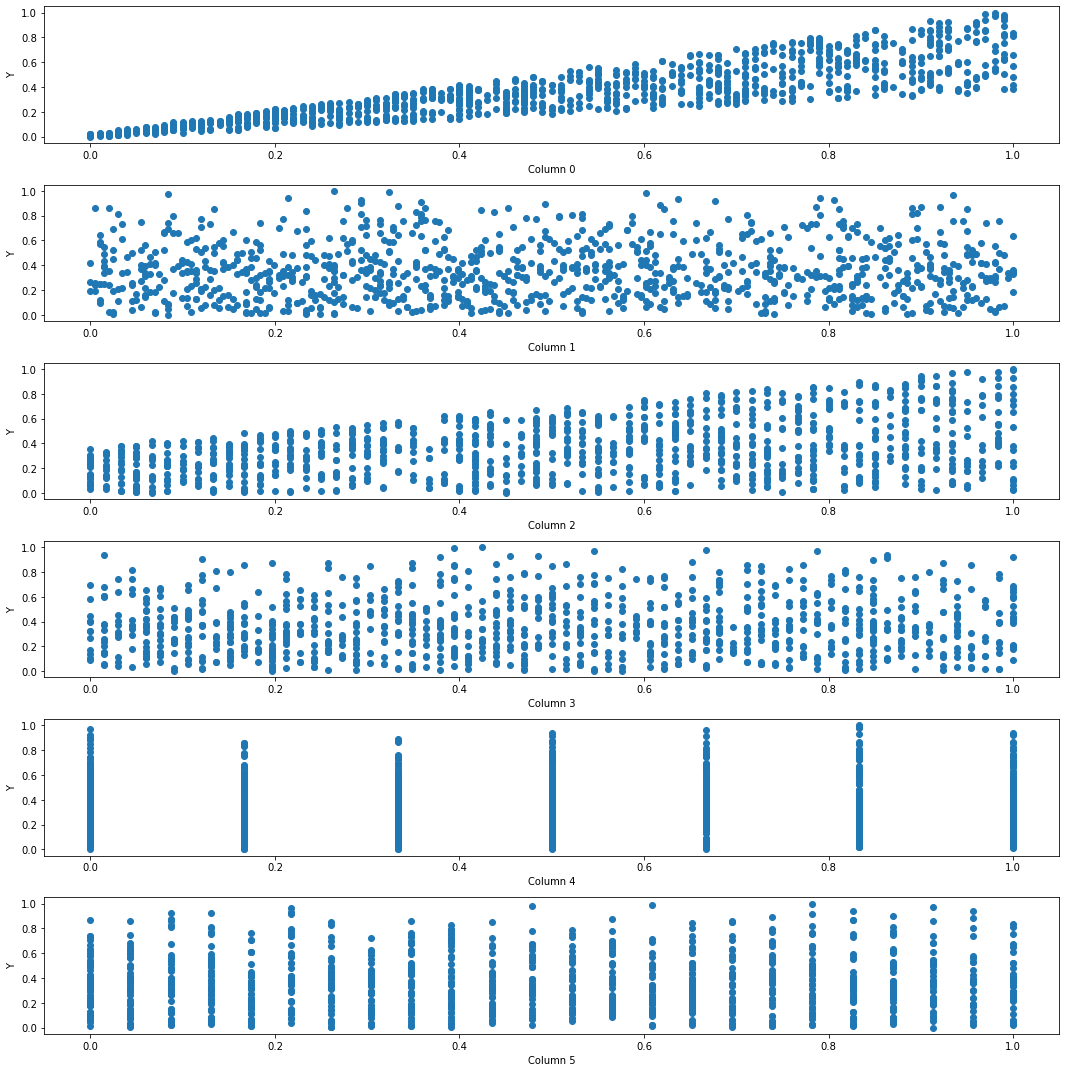

In [10]:
#Scatterplot all columns against last column
fig, ax = plt.subplots(df.shape[1]-1, figsize=(15, 15)) #Figsize ( length, height )
for i in range(df.shape[1]-1):   #This loop is why we wanted to keep column name numeric, and not keep original names
    
    ax[i].scatter(x = df[i], y = df[6])
    ax[i].set_xlabel("Column " + str(i))
    ax[i].set_ylabel("Y")
fig.tight_layout()
plt.show()


In [11]:
x = df.values #returns a numpy array
x = scaler.inverse_transform(x)
df = pd.DataFrame(x)
df.head()

,0,1,2,3,4,5,6
0,33.0,206.0,87.0,81.0,2.0,4.0,31.34
1,49.0,14.0,86.0,50.0,0.0,9.0,44.26
2,79.0,72.0,90.0,62.0,1.0,5.0,73.94
3,28.0,173.0,49.0,67.0,0.0,5.0,14.93
4,62.0,189.0,92.0,47.0,1.0,20.0,59.60


In [12]:
X = pd.DataFrame(df[0])
y = pd.DataFrame(df[6])

#Now, split the set in training and testing set
#test_size = 0.33 tell the function that 1/3 of values should be put in test arrat
#Random state is a variable that seeds the random generator. In that way
#you'll get the same training and testing set each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

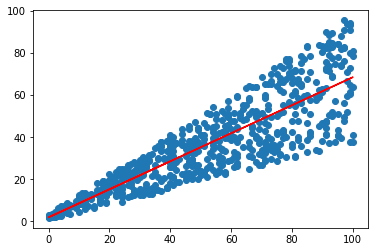

MSE = 116.45444051948108


In [16]:
plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

MSE =99.55992955525117


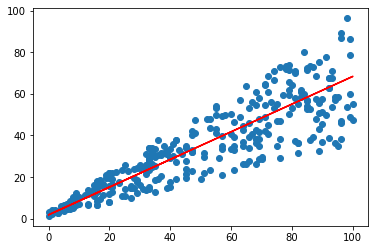

In [17]:
Y_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show
print( "MSE ="+str(metrics.mean_squared_error(y_test,Y_pred)))

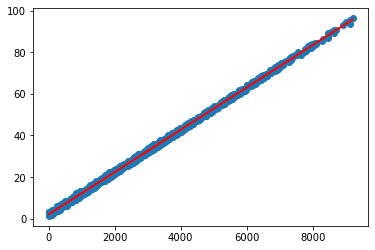

MSE = 0.4218388098514433


In [18]:
df[7] = df[0]*df[2]

X = pd.DataFrame(df[7])
Y = pd.DataFrame(df[6])
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(Y,Y_pred)))


In [19]:
linear_regressor.predict([[95*63]])

array([[62.93803549]])

In [21]:
df2 = pd.read_csv("https://raw.githubusercontent.com/ThomasJRye/Intro_to_AI_2021/main/Lab4/data_test.csv")
#Make a new column for Var1 * Var3
df2["Combined"] = df2["Var1"]*df2["Var3"]